# Diabetes dataset

Oscar Miranda Escalante A01630791

24 de mayo de 2023



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch

In [2]:
diabetes_df = pd.read_csv("../data/diabetes.txt", sep='\t')
diabetes_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


## Data inspection

In [3]:
# rows, columns
diabetes_df.shape

(442, 11)

In [4]:
# features
diabetes_df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [5]:
# data types
diabetes_df.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [6]:
# display rows with any missing (NaN) valies
diabetes_df[diabetes_df.isna().any(axis=1)]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y


### Finding relevant features

**Scatter plotts**

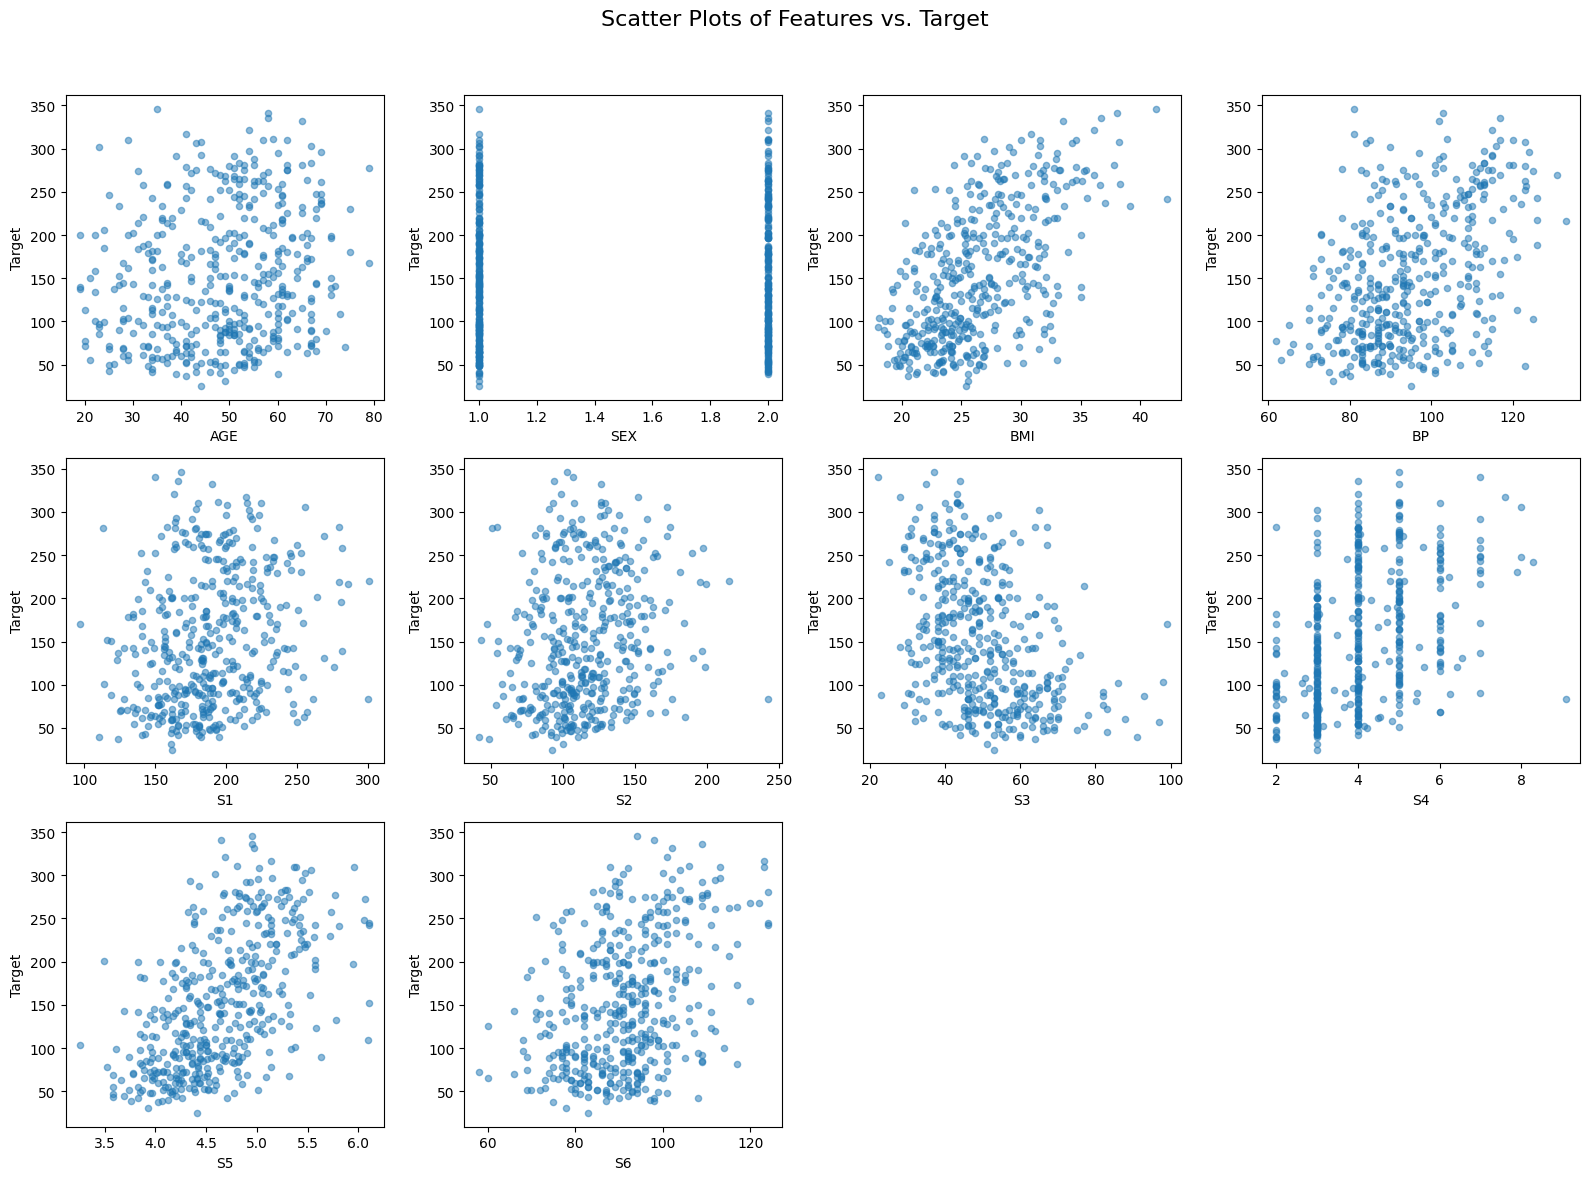

In [7]:
# Prepare the dataset
X = diabetes_df.drop('Y', axis=1)
y = diabetes_df['Y']

X_features = X.columns
num_features = len(X_features)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.suptitle('Scatter Plots of Features vs. Target', fontsize=16)

# Plot scatter plots for each feature
for i, ax in enumerate(axes.flat):
    if i < num_features:
        feature = X_features[i]
        ax.scatter(X[feature], y, s=20, alpha=0.5)
        ax.set_xlabel(feature)
        ax.set_ylabel('Target')

# Remove empty subplots if the number of features is less than 12
if num_features < 12:
    for j in range(num_features, 12):
        fig.delaxes(axes.flat[j])

# Adjust spacing between subplots
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()


This features seem irrelevant (random scatter distribution):
- Age
- Sex
- S1
- S2
- S3

**Correlation heatmap**

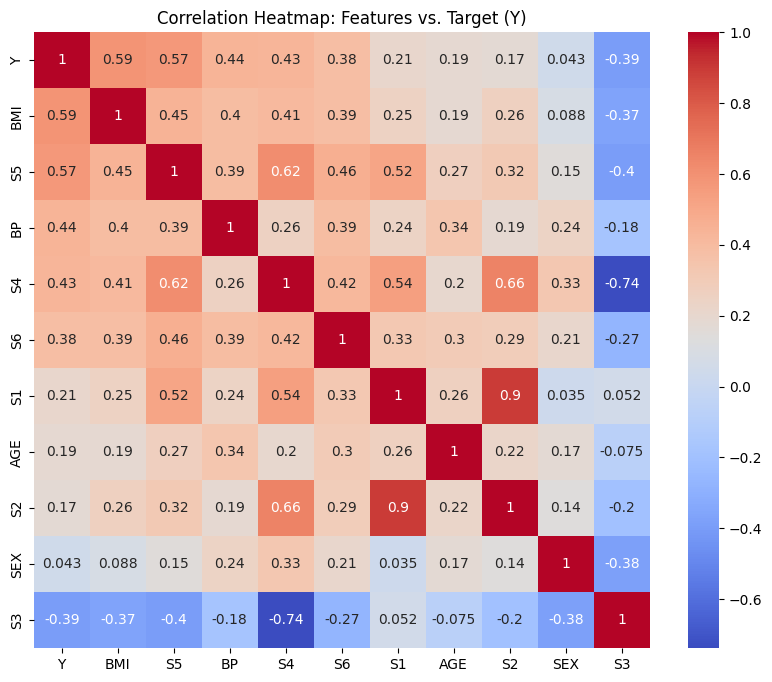

In [8]:
corr_matrix = diabetes_df.corr()

# Sort the correlation matrix by the target variable 'Y'
sorted_corr = corr_matrix['Y'].sort_values(ascending=False)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df[sorted_corr.index].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap: Features vs. Target (Y)')
plt.show()


This heatmap shows more clearly that features S1, AGE, S2, SEX and S3 are not relevant and, maybe, discarding them will improve the performance of the model.

Features 'S6', 'S4', 'BP' will be also be dropped because they show weak correlation as well.

## Normalization

In [9]:
X = diabetes_df.drop('Y', axis=1)

scaler = StandardScaler()
X[:] = scaler.fit_transform(X)
X.head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


## Testing `DiabetesDataset` module

In [10]:
import sys
sys.path.append('/Users/oscar/Local/diabetes_model')

In [11]:
from modules.dataset import DiabetesDataset

In [12]:
path = '../data/diabetes.txt'

diabetes_dataset = DiabetesDataset(path=path, normalize=True)

diabetes_dataset[:15]

(tensor([[ 8.0050e-01,  1.0655e+00,  1.2971e+00,  4.5984e-01, -9.2975e-01,
          -7.3206e-01, -9.1245e-01, -5.4499e-02,  4.1853e-01, -3.7099e-01],
         [-3.9567e-02, -9.3854e-01, -1.0822e+00, -5.5350e-01, -1.7762e-01,
          -4.0289e-01,  1.5644e+00, -8.3030e-01, -1.4366e+00, -1.9385e+00],
         [ 1.7933e+00,  1.0655e+00,  9.3453e-01, -1.1921e-01, -9.5867e-01,
          -7.1890e-01, -6.8024e-01, -5.4499e-02,  6.0156e-02, -5.4515e-01],
         [-1.8724e+00, -9.3854e-01, -2.4377e-01, -7.7065e-01,  2.5629e-01,
           5.2540e-01, -7.5765e-01,  7.2130e-01,  4.7698e-01, -1.9682e-01],
         [ 1.1317e-01, -9.3854e-01, -7.6494e-01,  4.5984e-01,  8.2726e-02,
           3.2789e-01,  1.7118e-01, -5.4499e-02, -6.7250e-01, -9.8057e-01],
         [-1.9488e+00, -9.3854e-01, -8.5558e-01, -4.0874e-01, -1.4504e+00,
          -1.6669e+00,  8.6780e-01, -1.6061e+00, -8.6568e-01, -2.0256e+00],
         [-9.5600e-01,  1.0655e+00, -9.9154e-01, -3.3636e-01, -8.4296e-01,
          -5.2139e-

In [16]:
X, y = diabetes_dataset[:]

y[:10]

tensor([[151.],
        [ 75.],
        [141.],
        [206.],
        [135.],
        [ 97.],
        [138.],
        [ 63.],
        [110.],
        [310.]])